# Model of gain and loss operator 
Reference is the model of decay only:
$$ E\psi = E_0 \psi - \frac{i}{\gamma}\psi$$
## Set the $E_0$ and change the temperature

In [1]:
import numpy as np
import qutip as qp
import matplotlib.pyplot as plt

In [38]:
nmax = 5; # number of the particle of state
n0 = 1;
hbar = 6.626*(10**-34)*(10**3)*(10**12)/(2*np.pi*1.6*10**-19); # Planck constant  [meV*ps]
kB = 8.617*10**-2; # Boltzmann Constant [meV/K]


T = [0.1, 1, 10, 100]; #[k]

gamma = 30; # lifetime of the particle of state [ps]
Gamma = gamma**-1;
E0 = 1; # Energy of the state [meV]

A = qp.destroy(nmax+1); # Destruction operator of state
IdN = qp.qeye(nmax+1); # Identity matrix 

H0 = (E0/hbar)*(A.dag()*A); # Hamiltonian 0

def bose(E,T):
        return (np.exp(E/(kB*T))-1)**-1; # define the bose


     
tlist = np.linspace(0,500,5001);
psi0 = qp.fock(nmax+1,n0);
     
n = []    
     
for TT in T:
    J_o = [np.sqrt(Gamma*(bose(E0,TT)+1))*A,np.sqrt(Gamma*(bose(E0,TT)))*A.dag()];
    data = qp.mesolve(H0,psi0,tlist,J_o,A.dag()*A);
    n.append(data.expect[0]);
    

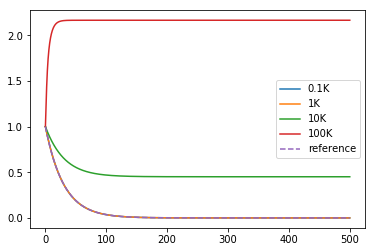

In [39]:
plt.plot(tlist,n[0],label='0.1K');
plt.plot(tlist,n[1],label='1K');
plt.plot(tlist,n[2],label='10K');
plt.plot(tlist,n[3],label='100K');
plt.plot(tlist,n0*np.exp(-tlist/gamma),label='reference',linestyle='dashed')
plt.legend(loc='best')

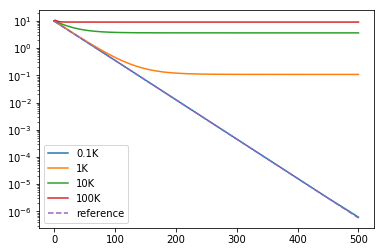

In [22]:
plt.semilogy(tlist,n[0],label='0.1K');
plt.semilogy(tlist,n[1],label='1K');
plt.semilogy(tlist,n[2],label='10K');
plt.semilogy(tlist,n[3],label='100K');
plt.semilogy(tlist,n0*np.exp(-tlist/gamma),label='reference',linestyle='dashed')
plt.legend(loc='best')

## Change the $E_0$ and fix the temperature

In [12]:
nmax = 20; # number of the particle of state
n0 = 10;
hbar = 6.626*(10**-34)*(10**3)*(10**12)/(2*np.pi*1.6*10**-19); # Planck constant  [meV*ps]
kB = 8.617*10**-2; # Boltzmann Constant [meV/K]


T = 10; #[k]

gamma = 100; # lifetime of the particle of state [ps]
Gamma = gamma**-1;
EE = [0.1, 1, 10, 100]; # Energy of the state [meV]

A = qp.destroy(nmax+1); # Destruction operator of state
IdN = qp.qeye(nmax+1); # Identity matrix 

H0 = (E0/hbar)*(A.dag()*A); # Hamiltonian 0

def bose(E,T):
        return (np.exp(E/(kB*T))-1)**-1; # define the bose


     
tlist = np.linspace(0,500,5001);
psi0 = qp.fock(nmax+1,n0);
     
n = []    
     
for E0 in EE:
    J_o = [np.sqrt(Gamma*(bose(E0,T)+1))*A,np.sqrt(Gamma*(bose(E0,T)))*A.dag()];
    data = qp.mesolve(H0,psi0,tlist,J_o,A.dag()*A);
    n.append(data.expect[0]);
    

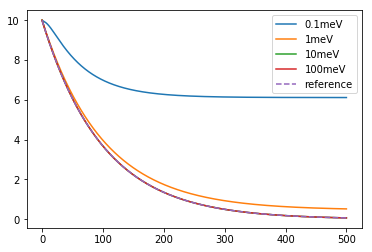

In [13]:
plt.plot(tlist,n[0],label='0.1meV');
plt.plot(tlist,n[1],label='1meV');
plt.plot(tlist,n[2],label='10meV');
plt.plot(tlist,n[3],label='100meV');
plt.plot(tlist,n0*np.exp(-tlist/gamma),label='reference',linestyle='dashed')
plt.legend(loc='best')

# Pumping threshold

In [44]:
nmax = 10; # number of the particle of state
n0 = 0;
hbar = 6.626*(10**-34)*(10**3)*(10**12)/(2*np.pi*1.6*10**-19); # Planck constant  [meV*ps]
kB = 8.617*10**-2; # Boltzmann Constant [meV/K]

P = [0.01, 0.1, 1, 10];
T = 20;

gamma = 30; # lifetime of the particle of state [ps]
Gamma = gamma**-1;
E0 = 0.5; # Energy of the state [meV]

A = qp.destroy(nmax+1); # Destruction operator of state
IdN = qp.qeye(nmax+1); # Identity matrix 

H0 = (E0/hbar)*(A.dag()*A); # Hamiltonian 0

def bose(E,T):
        return (np.exp(E/(kB*T))-1)**-1; # define the bose

tlist = np.linspace(0,500,5001);
psi0 = qp.fock(nmax+1,n0);
     
n = []    
     
for PP in P:
    J_o = [np.sqrt(Gamma*PP*(1.+bose(E0,T)**-1))*A,np.sqrt(Gamma*PP)*A.dag()];
    data = qp.mesolve(H0,psi0,tlist,J_o,A.dag()*A);
    n.append(data.expect[0]);
    

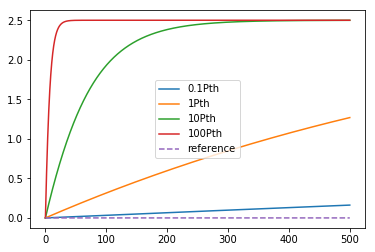

In [45]:
plt.plot(tlist,n[0],label='0.1Pth');
plt.plot(tlist,n[1],label='1Pth');
plt.plot(tlist,n[2],label='10Pth');
plt.plot(tlist,n[3],label='100Pth');
plt.plot(tlist,n0*np.exp(-tlist/gamma),label='reference',linestyle='dashed')
plt.legend(loc='best')

In [8]:
n[3][-1]

1.2226641386481139

In [17]:
n[3][-1]

1.252857876027811

In [37]:
qp.thermal_dm(3,0.1)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.90977444 0.         0.        ]
 [0.         0.08270677 0.        ]
 [0.         0.         0.0075188 ]]